In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

In [2]:
import re

In [3]:
Cities = {"delhi-ncr" : 216, "mumbai" : 203, "bengaluru" : 225, "chennai" : 94, "pune" : 96, "kolkata" : 94, "goa" : 72, 
         "ahmedabad" : 58, "jaipur" : 87, "hyderabad" : 117, "lucknow" : 52, "indore" : 40}

In [6]:
import time

RestaurantName = []
Location = []
Cuisines = []
Price = []
Discount = []
Rating = []
City = []

total_time = time.time()

for key, value in Cities.items():
    start_time = time.time()
    
    for i in range(1,value): 
        URL = f"https://www.eazydiner.com/restaurants?location={key}&page={i}"
        page = requests.get(URL)
        soup = BeautifulSoup(page.text, "html.parser")

            
        for x in soup.find_all('div', attrs={'class':'bg-white listing_center_content__Bq_9P'}):
            name = x.find('a', attrs={'class':'ellipsis listing_res_name__uVIN8'})
            loc = x.find('div', attrs={'class':'ellipsis'})
            cuisine = x.find('div', attrs={'class':'flex align-v-center ellipsis listing_multi_cuisines__zLLXK'})
            price = x.find('div', attrs={'class':'flex align-v-center'})
            rating = x.find('tspan', attrs = {'x' : 8, 'y' : 16})
            
            RestaurantName.append(name.text if name else np.nan)
            Location.append(loc.text if loc else np.nan)
            Cuisines.append(cuisine.text if cuisine else np.nan)
            Price.append(price.text if price else np.nan)
            Rating.append(rating.text if rating else np.nan)
    
        for x in soup.find_all('div', attrs={'class':'flex align-v-center ellipsis'}):
            dis = x.find('div', attrs={'class':'ellipsis listing_offer_text__LXKw1'})
    
            Discount.append(dis.text if dis else np.nan)

            City.append(key.capitalize())
        print("Completed")
    print("------------------")
    print(f'{key} completed in {time.time()-start_time:.2f} seconds')

print("Total Time Completed in seconds", str(time.time()-total_time))

Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed


In [10]:
easy_diner_df = pd.DataFrame({"RestaurantName" : RestaurantName, "Location" : Location, "Cuisines" : Cuisines, "Price" : Price, 
                          "Rating" : Rating, "Discount" : Discount, "City" : City})

In [11]:
easy_diner_df

,RestaurantName,Location,Cuisines,Price,Rating,Discount,City
0,Hard Rock Cafe,"Connaught Place (CP), Central Delhi | View Al...",Multicuisine,₹ 1500 for two approx.,4.0,35% Off + 25% Off,Delhi-ncr
1,Zing,"The Metropolitan Hotel & Spa, New Delhi",Multicuisine,₹ 3500 for two approx.,1.0,25% Off + 25% Off,Delhi-ncr
2,Lazeez Affaire,"Connaught Place (CP), Central Delhi | View Al...",North Indian,₹ 1600 for two approx.,4.3,15% Off + 25% Off,Delhi-ncr
3,Sorrento,Shangri-La Eros New Delhi,Italian,₹ 3000 for two approx.,4.6,30% Off + 25% Off,Delhi-ncr
4,Thyme,"The Umrao, New Delhi",Multicuisine,₹ 1800 for two approx.,4.1,50% Off + 25% Off,Delhi-ncr
...,...,...,...,...,...,...,...
12017,Triple 9 Cafe,"Mayakhedi, Indore",Multicuisine,₹ 400 for two approx.,4.0,25% Off :Payeazy,Indore
12018,Bel Air Mansion,"Rau, Indore",Multicuisine,₹ 700 for two approx.,1.0,10% Off + 25% Off,Indore
12019,Citrus Cafe,"Lemon Tree Hotel, indore",Multicuisine,₹ 1200 for two approx.,4.4,25% Off,Indore
12020,Slounge,"Lemon Tree Hotel, indore",Cocktail Menu,₹ 2000 for two approx.,4.9,30% Off,Indore


In [12]:
easy_diner_df.to_csv("EasyDinerData.csv", index = False)

In [13]:
df = pd.read_csv("EasyDinerData.csv")

In [14]:
df.head()

,RestaurantName,Location,Cuisines,Price,Rating,Discount,City
0,Hard Rock Cafe,"Connaught Place (CP), Central Delhi | View Al...",Multicuisine,₹ 1500 for two approx.,4.0,35% Off + 25% Off,Delhi-ncr
1,Zing,"The Metropolitan Hotel & Spa, New Delhi",Multicuisine,₹ 3500 for two approx.,1.0,25% Off + 25% Off,Delhi-ncr
2,Lazeez Affaire,"Connaught Place (CP), Central Delhi | View Al...",North Indian,₹ 1600 for two approx.,4.3,15% Off + 25% Off,Delhi-ncr
3,Sorrento,Shangri-La Eros New Delhi,Italian,₹ 3000 for two approx.,4.6,30% Off + 25% Off,Delhi-ncr
4,Thyme,"The Umrao, New Delhi",Multicuisine,₹ 1800 for two approx.,4.1,50% Off + 25% Off,Delhi-ncr


In [15]:
df.shape

(12022, 7)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12022 entries, 0 to 12021
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RestaurantName  12022 non-null  object 
 1   Location        12022 non-null  object 
 2   Cuisines        11994 non-null  object 
 3   Price           12022 non-null  object 
 4   Rating          12017 non-null  float64
 5   Discount        12022 non-null  object 
 6   City            12022 non-null  object 
dtypes: float64(1), object(6)
memory usage: 657.6+ KB


In [17]:
df.isnull().sum()

RestaurantName     0
Location           0
Cuisines          28
Price              0
Rating             5
Discount           0
City               0
dtype: int64

In [18]:
df["Cuisines"].value_counts()

Cuisines
Multicuisine                 4992
Indian                        385
Fast Food                     357
North Indian                  344
Cafe                          329
                             ... 
Awadhi, Italian, oriental       1
Continental, European           1
Sizzlers, Multicuisine          1
Lucknowi, North Indian          1
Ice Cream, Shakes               1
Name: count, Length: 1164, dtype: int64

In [19]:
df["Cuisines"].fillna(df["Cuisines"].mode()[0], inplace = True)

In [20]:
df["Cuisines"].isnull().sum()

np.int64(0)

In [21]:
df["Rating"].fillna(df["Rating"].mean(), inplace = True)

In [22]:
df["Rating"].isnull().sum()

np.int64(0)

In [23]:
df.isnull().sum()

RestaurantName    0
Location          0
Cuisines          0
Price             0
Rating            0
Discount          0
City              0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(66)

In [25]:
df.drop_duplicates(inplace = True)

In [26]:
df.duplicated().sum()

np.int64(0)

In [32]:
df["City"] = df["City"].apply(lambda x : re.split(r"-", x)[0])

In [34]:
df["Price"]

0        ₹ 1500 for two approx.
1        ₹ 3500 for two approx.
2        ₹ 1600 for two approx.
3        ₹ 3000 for two approx.
4        ₹ 1800 for two approx.
                  ...          
12017     ₹ 400 for two approx.
12018     ₹ 700 for two approx.
12019    ₹ 1200 for two approx.
12020    ₹ 2000 for two approx.
12021    ₹ 1000 for two approx.
Name: Price, Length: 11956, dtype: object

In [35]:
df["Price_"] = df["Price"].apply(
    lambda x: re.search(r"(\d+)", x).group(1)
    if isinstance(x, str) and re.search(r"(\d+)", x)
    else None
)

In [36]:
df["People_"] = df["Price"].apply(
    lambda x: re.search(r"for\s+([A-Za-z]+)", x).group(1)
    if isinstance(x, str) and re.search(r"for\s+([A-Za-z]+)", x)
    else None
)

In [37]:
df["Price"] = df["Price_"].str.extract(r"(\d+)")
df["People"] = df["People_"].map({"two": 2})

In [39]:
df["Discount"]

0           35% Off + 25% Off
1           25% Off + 25% Off
2           15% Off + 25% Off
3           30% Off + 25% Off
4           50% Off + 25% Off
                 ...         
12017        25% Off :Payeazy
12018       10% Off + 25% Off
12019                 25% Off
12020                 30% Off
12021    Extra 200 EazyPoints
Name: Discount, Length: 11956, dtype: object

In [40]:
df["Discount_List"] = df["Discount"].apply(
    lambda x: [int(n) for n in re.findall(r"\d+", x)] if isinstance(x, str) else []
)

In [41]:
df["Discount_List"]

0        [35, 25]
1        [25, 25]
2        [15, 25]
3        [30, 25]
4        [50, 25]
           ...   
12017        [25]
12018    [10, 25]
12019        [25]
12020        [30]
12021       [200]
Name: Discount_List, Length: 11956, dtype: object

In [42]:
df["Primary_Discount"] = df["Discount_List"].apply(lambda x: x[0] if len(x) > 0 else np.nan)
df["Secondary_Discount"] = df["Discount_List"].apply(lambda x: x[-1] if len(x) > 0 else np.nan)

In [43]:
df["Primary_Discount"].fillna(df["Primary_Discount"].mean(), inplace = True)

In [44]:
df["Primary_Discount(%)"] = df["Primary_Discount"].astype("int")

In [45]:
df["Secondary_Discount"].fillna(df["Secondary_Discount"].mean(), inplace = True)

In [46]:
df["Secondary_Discount(%)"] = df["Secondary_Discount"].astype("int")

In [47]:
df["Price"] = df["Price"].astype("int")

In [48]:
df.columns

Index(['RestaurantName', 'Location', 'Cuisines', 'Price', 'Rating', 'Discount',
       'City', 'Price_', 'People_', 'People', 'Discount_List',
       'Primary_Discount', 'Secondary_Discount', 'Primary_Discount(%)',
       'Secondary_Discount(%)'],
      dtype='object')

In [49]:
df.drop(columns = {'Location', 'Discount', 'Price_', 'People_', 'Discount_List', 'Primary_Discount', 'Secondary_Discount'}, inplace = True)

In [81]:
df["Single_Price"] = (df["Price"]/df["People"]).astype("int")

In [115]:
df.head(10)

,RestaurantName,Cuisines,Price,Rating,City,People,Primary_Discount(%),Secondary_Discount(%),Single_Price
0,Hard Rock Cafe,Multicuisine,1500,4.0,Delhi,2,35,25,750
1,Zing,Multicuisine,3500,1.0,Delhi,2,25,25,1750
2,Lazeez Affaire,North Indian,1600,4.3,Delhi,2,15,25,800
3,Sorrento,Italian,3000,4.6,Delhi,2,30,25,1500
4,Thyme,Multicuisine,1800,4.1,Delhi,2,50,25,900
5,Cafe Out of the Box Courtyard,Multicuisine,1200,3.9,Delhi,2,30,25,600
6,"Chutney, Bar + Tandoor",Indian,3000,3.5,Delhi,2,25,25,1500
7,Fifty9,Multicuisine,2500,4.4,Delhi,2,35,25,1250
8,Desi Villagio,Indian,1300,4.1,Delhi,2,40,25,650
9,Shang Palace,Chinese,3000,4.5,Delhi,2,30,25,1500


In [84]:
df.duplicated().sum()

np.int64(0)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11906 entries, 0 to 12021
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RestaurantName         11906 non-null  object 
 1   Cuisines               11906 non-null  object 
 2   Price                  11906 non-null  int64  
 3   Rating                 11906 non-null  float64
 4   City                   11906 non-null  object 
 5   People                 11906 non-null  int64  
 6   Primary_Discount(%)    11906 non-null  int64  
 7   Secondary_Discount(%)  11906 non-null  int64  
 8   Single_Price           11906 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 930.2+ KB


In [116]:
df.rename(columns={"Price": "Price_for_2", "Single_Price" : "Price"}, inplace=True)

In [117]:
df.head(10)

,RestaurantName,Cuisines,Price_for_2,Rating,City,People,Primary_Discount(%),Secondary_Discount(%),Price
0,Hard Rock Cafe,Multicuisine,1500,4.0,Delhi,2,35,25,750
1,Zing,Multicuisine,3500,1.0,Delhi,2,25,25,1750
2,Lazeez Affaire,North Indian,1600,4.3,Delhi,2,15,25,800
3,Sorrento,Italian,3000,4.6,Delhi,2,30,25,1500
4,Thyme,Multicuisine,1800,4.1,Delhi,2,50,25,900
5,Cafe Out of the Box Courtyard,Multicuisine,1200,3.9,Delhi,2,30,25,600
6,"Chutney, Bar + Tandoor",Indian,3000,3.5,Delhi,2,25,25,1500
7,Fifty9,Multicuisine,2500,4.4,Delhi,2,35,25,1250
8,Desi Villagio,Indian,1300,4.1,Delhi,2,40,25,650
9,Shang Palace,Chinese,3000,4.5,Delhi,2,30,25,1500


In [118]:
# Visualizations

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# Univariate

In [121]:
# Categorical

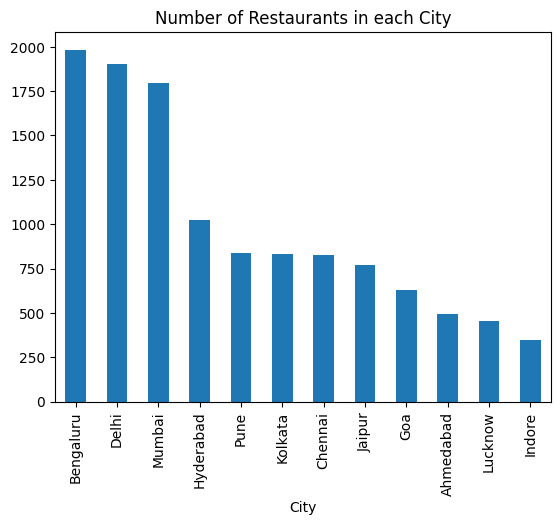

In [163]:
df["City"].value_counts().plot(kind = "bar")
plt.title("Number of Restaurants in each City")
plt.show()

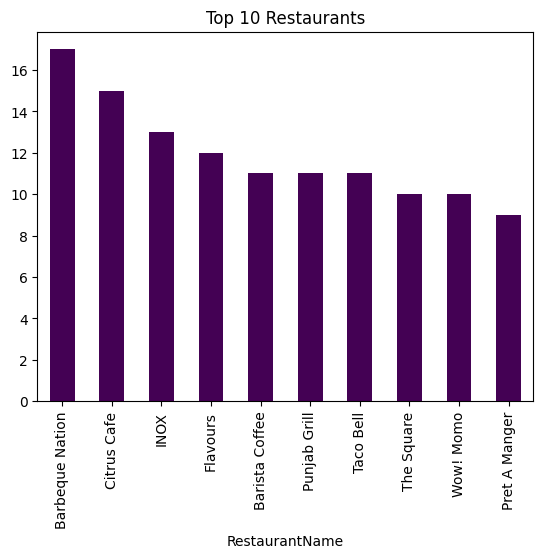

In [159]:
df["RestaurantName"].value_counts().head(10).plot(kind = "bar", colormap = "viridis")
plt.title("Top 10 Restaurants")
plt.show()

In [64]:
# Numerical

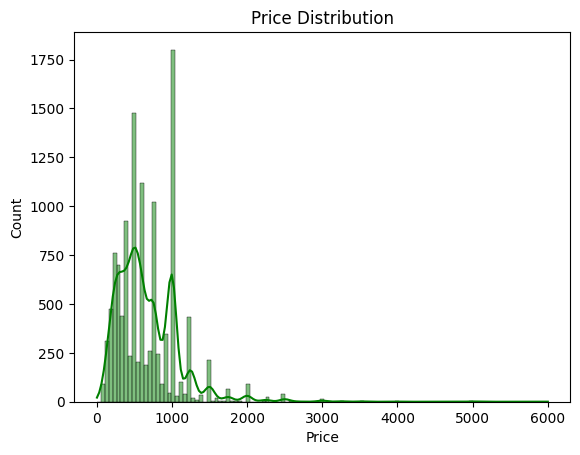

In [162]:
sns.histplot(x = df["Price"], kde = True, color="green")
plt.title("Price Distribution")
plt.show()

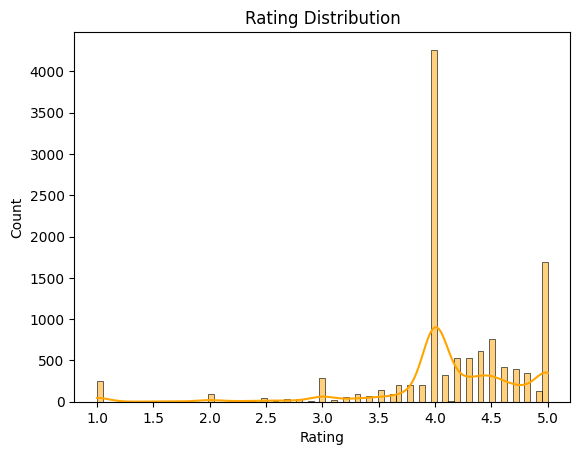

In [166]:
sns.histplot(x = df["Rating"], kde = True, color = "orange")
plt.title("Rating Distribution")
plt.show()

<Axes: ylabel='Price'>

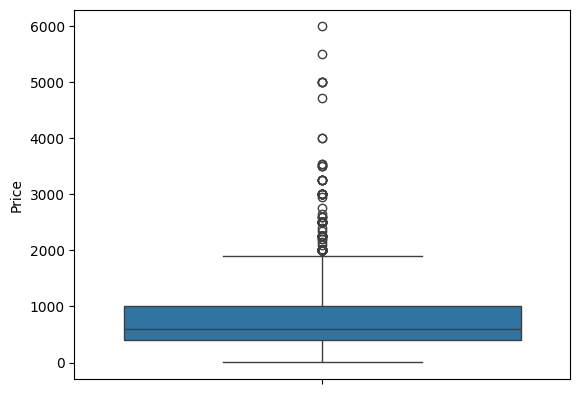

In [126]:
sns.boxplot(df["Price"])

In [127]:
q1 = df["Price"].quantile(0.25)
q3 = df["Price"].quantile(0.75) 
iqr = q3-q1

In [128]:
ll = q1-1.5*iqr
ul = q3+1.5*iqr

In [129]:
outliers = df[(df["Price"] < ll) | (df["Price"] > ul)]

In [130]:
outliers

,RestaurantName,Cuisines,Price_for_2,Rating,City,People,Primary_Discount(%),Secondary_Discount(%),Price
24,Sakura,"Japanese, Sushi",4500,4.0,Delhi,2,25,25,2250
74,Eau De Monsoon,Modern Indian,4000,4.4,Delhi,2,25,25,2000
112,Spectra,Multicuisine,5000,4.4,Delhi,2,20,25,2500
117,Food Exchange,Multicuisine,4000,4.1,Delhi,2,25,25,2000
136,Sultan,"Cocktail Menu, Multicuisine",4000,4.4,Delhi,2,50,25,2000
...,...,...,...,...,...,...,...,...,...
10307,Amara,Multicuisine,5000,4.5,Hyderabad,2,25,25,2500
10386,Kanak,Indian,4500,4.5,Hyderabad,2,25,25,2250
10658,Tuscany,Italian,4000,4.8,Hyderabad,2,25,25,2000
10789,Tevar - The Progressive Indian Kitchen & Bar,Modern Indian,4000,4.1,Hyderabad,2,25,25,2000


In [131]:
outliers["City"].value_counts()

City
Delhi        60
Mumbai       50
Bengaluru    30
Chennai      15
Jaipur       14
Pune          8
Hyderabad     8
Goa           8
Kolkata       7
Ahmedabad     2
Name: count, dtype: int64

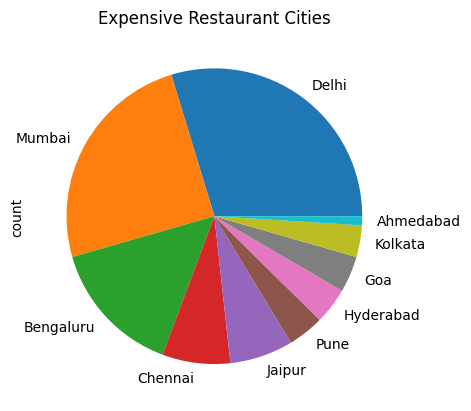

In [145]:
outliers["City"].value_counts().plot(kind = "pie")
plt.title("Expensive Restaurant Cities")
plt.show()

In [133]:
# Bivariate Analysis

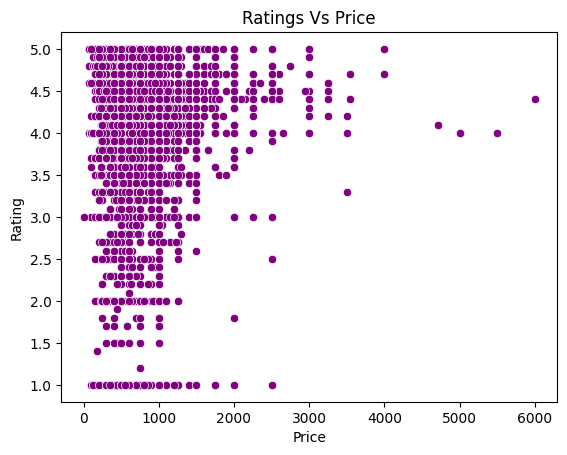

In [167]:
sns.scatterplot(x = "Price", y = "Rating", data = df, color = "purple")
plt.title("Ratings Vs Price")
plt.show()

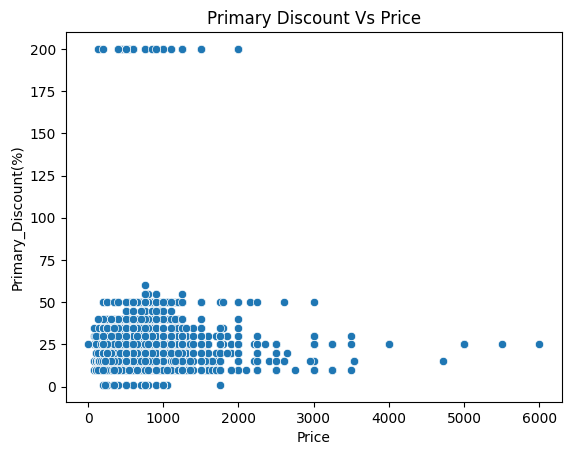

In [135]:
sns.scatterplot(x = "Price", y = "Primary_Discount(%)", data = df)
plt.title("Primary Discount Vs Price")
plt.show()

In [136]:
# Muitivariate Analysis

<Axes: xlabel='Price', ylabel='Rating'>

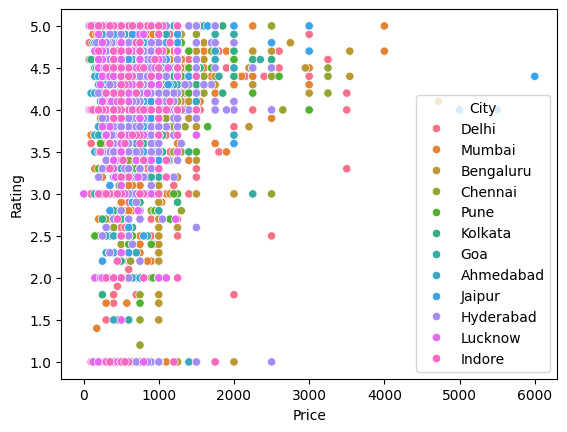

In [137]:
sns.scatterplot(x = "Price", y = "Rating", hue = "City", data = df)

<Axes: >

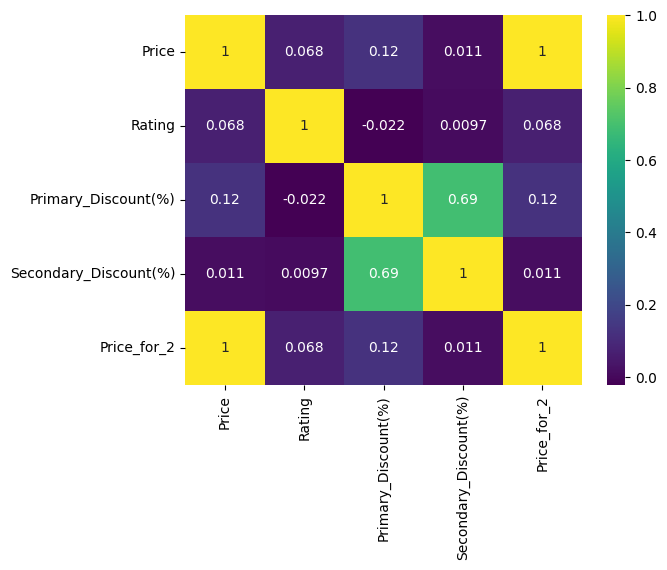

In [144]:
sns.heatmap(df[["Price", "Rating", "Primary_Discount(%)", "Secondary_Discount(%)", "Price_for_2"]].corr(), annot = True, cmap = "viridis")

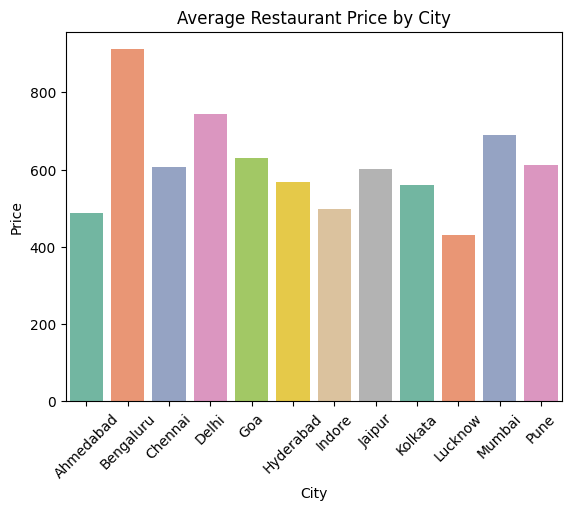

In [176]:
avg_price = df.groupby("City")["Price"].mean().reset_index()

# Plot
sns.barplot(x="City", y="Price", data=avg_price, palette="Set2")
plt.title("Average Restaurant Price by City")
plt.xticks(rotation=45)
plt.show()

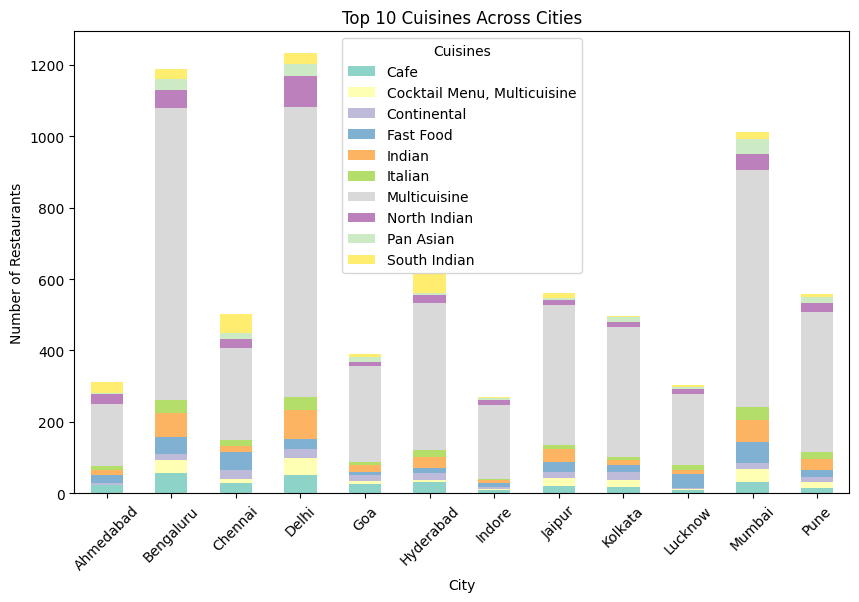

In [178]:
top_cuisines = df["Cuisines"].value_counts().nlargest(10).index

# Crosstab for City vs Cuisine
city_cuisine_top = pd.crosstab(
    df[df["Cuisines"].isin(top_cuisines)]["City"],
    df[df["Cuisines"].isin(top_cuisines)]["Cuisines"]
)

# Plot stacked bar chart
city_cuisine_top.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="Set3"
)

plt.title("Top 10 Cuisines Across Cities")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()